# UTI Dataset Exploration

This notebook explores a dataset containing various features related to Urinary Tract Infections (UTI). We'll analyze the relationships between different symptoms, lab results, and patient characteristics.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Use the correct seaborn style name for newer Matplotlib versions
sns.set_palette('husl')

In [2]:
# Load the dataset
df = pd.read_csv('../data/uti_synthetic_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (100000, 19)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   frequent_urination    100000 non-null  int64  
 1   painful_urination     100000 non-null  int64  
 2   lower_abdominal_pain  100000 non-null  int64  
 3   cloudy_urine          100000 non-null  int64  
 4   blood_in_urine        100000 non-null  int64  
 5   fever                 100000 non-null  int64  
 6   urgent_urination      100000 non-null  int64  
 7   foul_smelling_urine   100000 non-null  int64  
 8   nitrites              100000 non-null  int64  
 9   leukocyte_esterase    100000 non-null  int64  
 10  urine_ph              100000 non-null  float64
 11  age                   100000 non-null  float64
 12  gender                100000 non-null  int64  
 13  diabetes              100000 non-null  int64  
 14  hypertensi

## Basic Statistics and Data Distribution

In [3]:
# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Features:")
df.describe()

Summary Statistics for Numerical Features:


,frequent_urination,painful_urination,lower_abdominal_pain,cloudy_urine,blood_in_urine,fever,urgent_urination,foul_smelling_urine,nitrites,leukocyte_esterase,urine_ph,age,gender,diabetes,hypertension,wbc,rbc,bacteria,UTI
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.493920,0.46681,0.412740,0.386270,0.219400,0.275780,0.467630,0.275710,0.475610,0.500590,6.375980,35.438329,0.600410,0.149210,0.201050,11.756445,2.001653,0.502030,0.500000
std,0.499966,0.49890,0.492329,0.486896,0.413842,0.446909,0.498954,0.446874,0.499407,0.500002,1.016080,12.793147,0.489817,0.356297,0.400787,4.661207,1.630471,0.499998,0.500003
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500013,18.000000,0.000000,0.000000,0.000000,5.000003,0.000031,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.494483,25.543575,0.000000,0.000000,0.000000,7.510086,0.754693,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.500027,33.889402,1.000000,0.000000,0.000000,11.000012,1.500198,1.000000,0.500000
75%,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.255447,43.326581,1.000000,0.000000,0.000000,16.004996,3.004985,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.999967,80.000000,1.000000,1.000000,1.000000,19.999608,5.999850,1.000000,1.000000


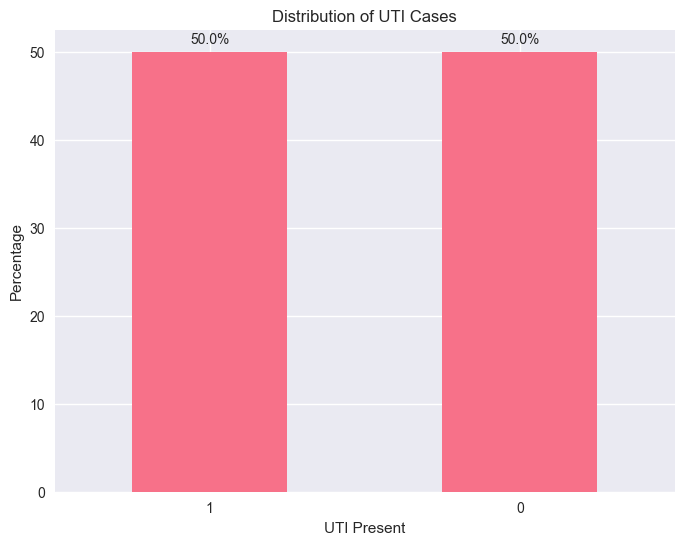

In [4]:
# Calculate the distribution of UTI cases
uti_distribution = df['UTI'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
uti_distribution.plot(kind='bar')
plt.title('Distribution of UTI Cases')
plt.xlabel('UTI Present')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
for i, v in enumerate(uti_distribution):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.show()

## Symptom Analysis

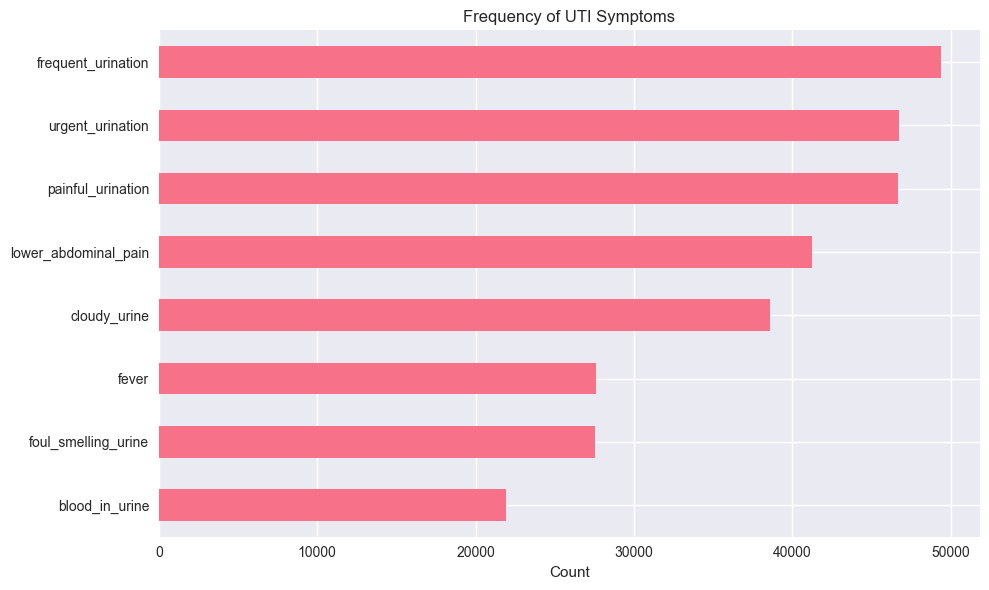

In [5]:
# Calculate symptom frequencies
symptoms = ['frequent_urination', 'painful_urination', 'lower_abdominal_pain', 
           'cloudy_urine', 'blood_in_urine', 'fever', 'urgent_urination', 
           'foul_smelling_urine']

symptom_freq = df[symptoms].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
symptom_freq.plot(kind='barh')
plt.title('Frequency of UTI Symptoms')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

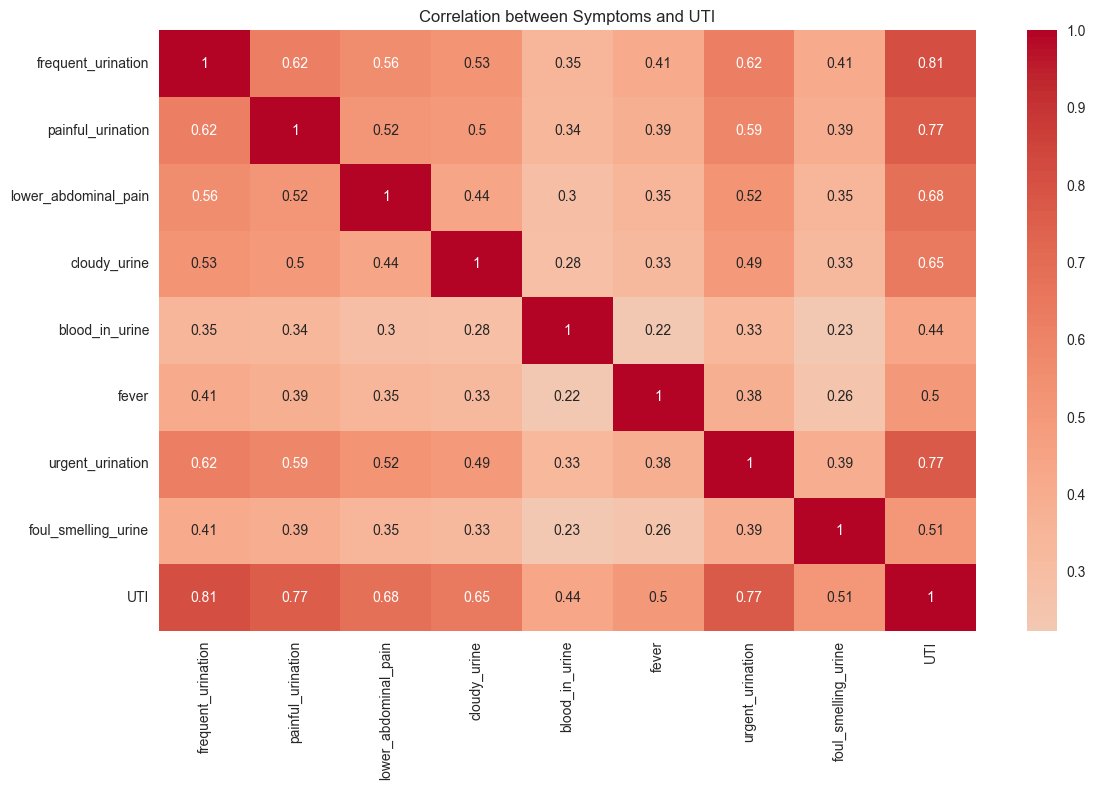

In [6]:
# Create correlation matrix for symptoms and UTI
correlation_matrix = df[symptoms + ['UTI']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Symptoms and UTI')
plt.tight_layout()
plt.show()

## Lab Results Analysis

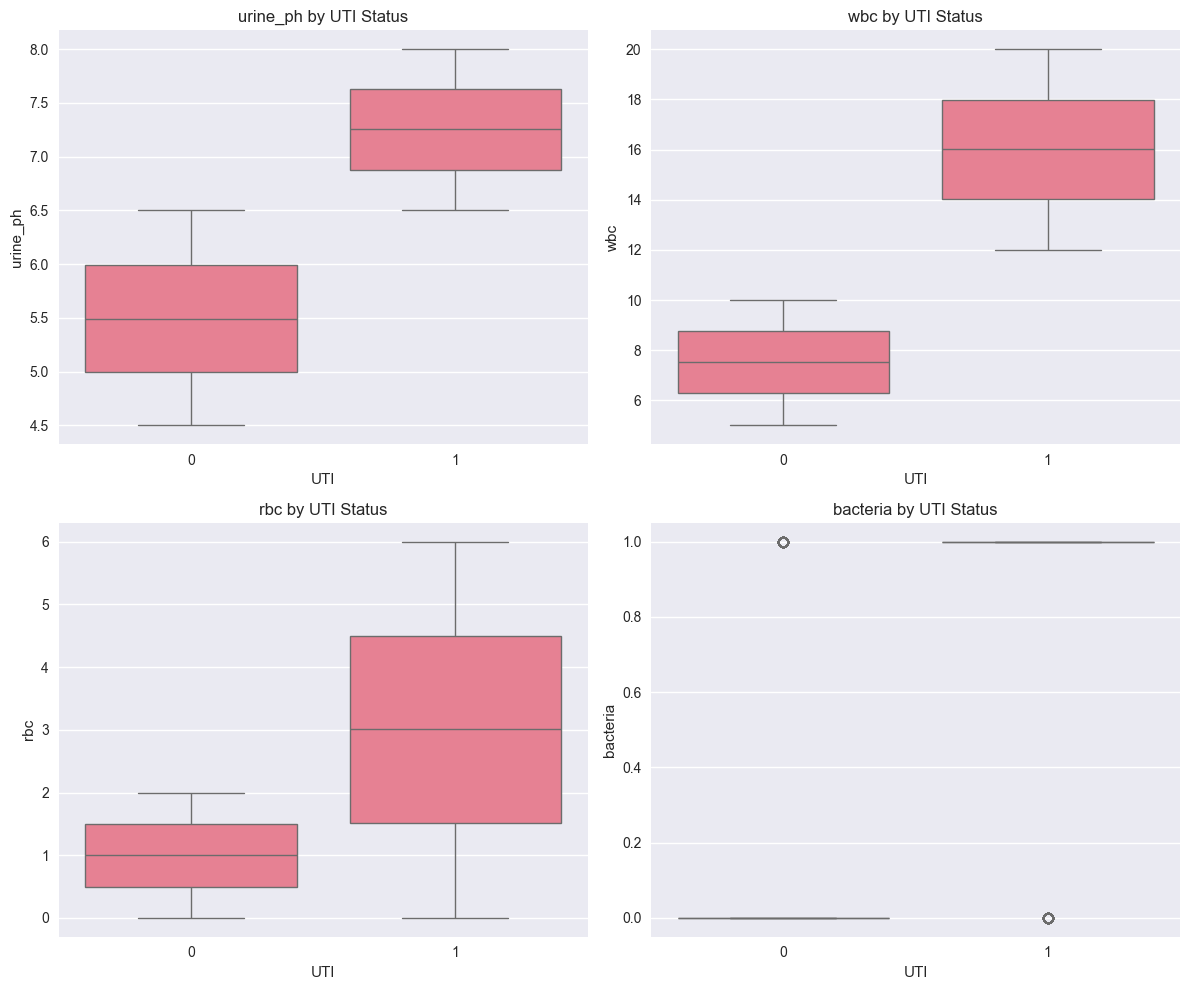

In [7]:
# Box plots for lab results by UTI status
lab_results = ['urine_ph', 'wbc', 'rbc', 'bacteria']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(lab_results):
    sns.boxplot(data=df, x='UTI', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by UTI Status')

plt.tight_layout()
plt.show()

## Demographic Analysis

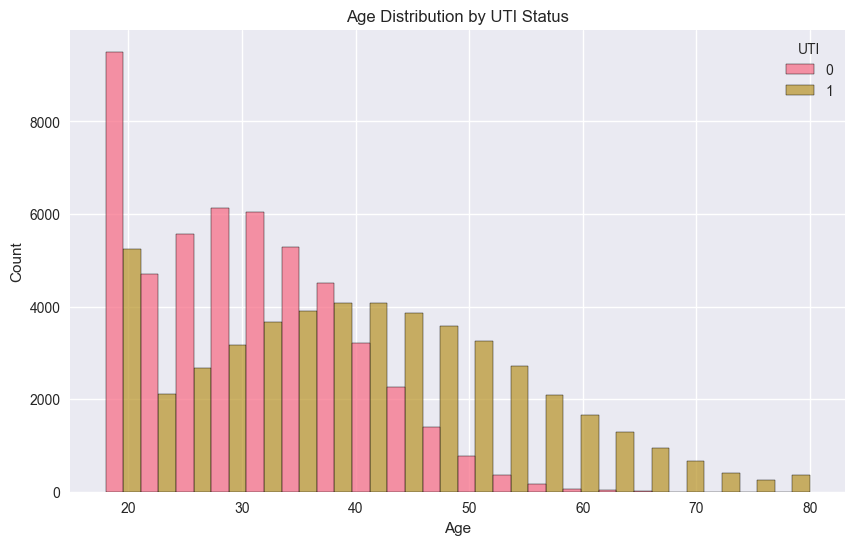

In [8]:
# Age distribution by UTI status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='UTI', multiple="dodge", bins=20)
plt.title('Age Distribution by UTI Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Contingency Table for gender:
UTI             0          1
gender                      
0       50.188944  49.811056
1       49.874253  50.125747


<Figure size 800x600 with 0 Axes>

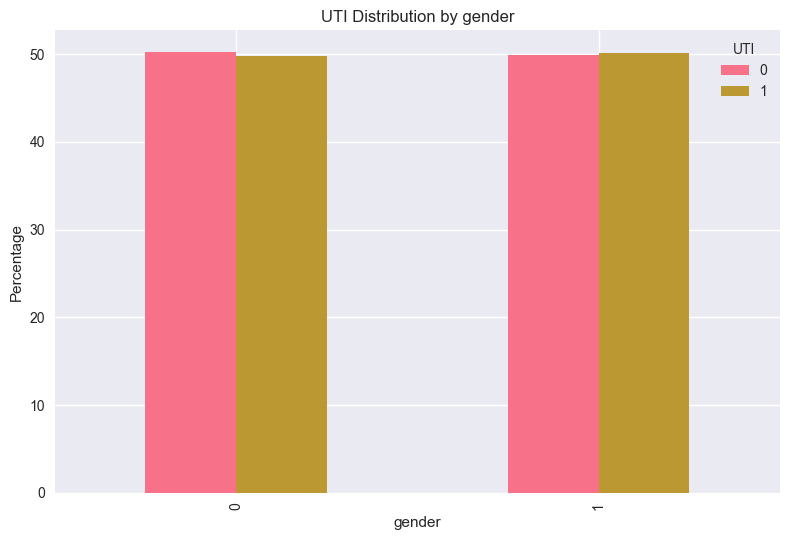


Contingency Table for diabetes:
UTI               0          1
diabetes                      
0         55.889232  44.110768
1         16.419811  83.580189


<Figure size 800x600 with 0 Axes>

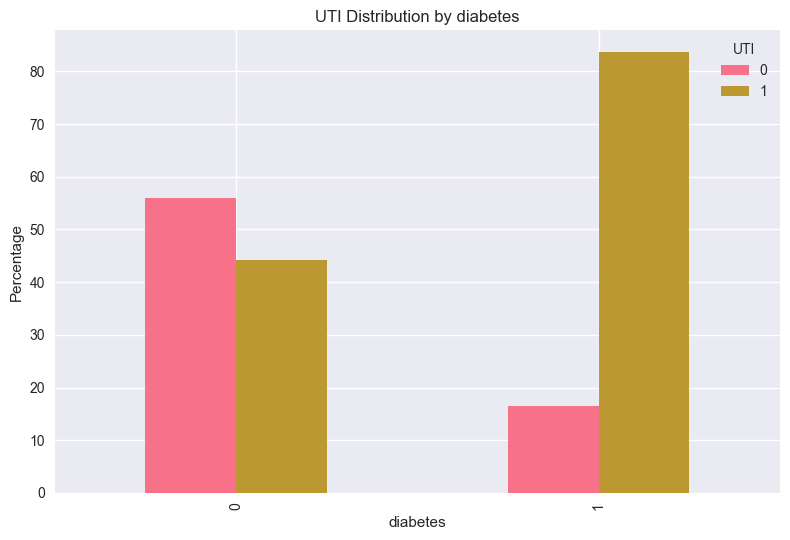


Contingency Table for hypertension:
UTI                   0          1
hypertension                      
0             56.265098  43.734902
1             25.103208  74.896792


<Figure size 800x600 with 0 Axes>

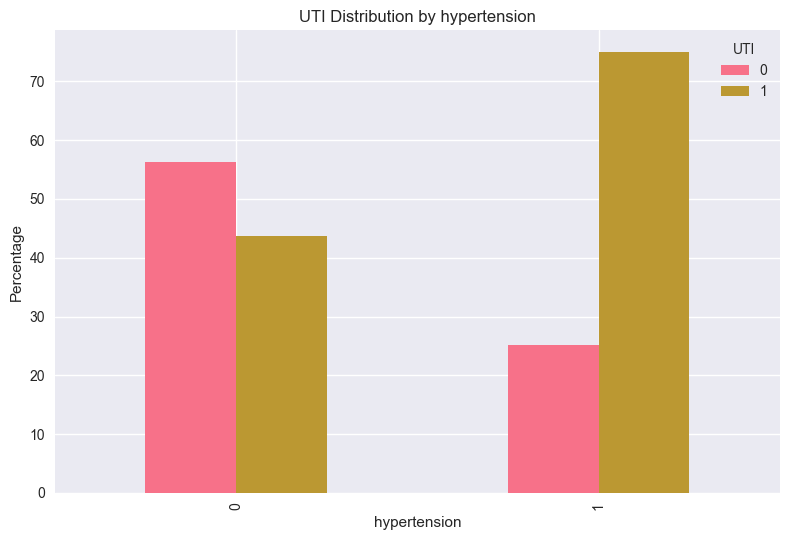

In [9]:
# Create contingency tables for categorical variables
categorical_vars = ['gender', 'diabetes', 'hypertension']

for var in categorical_vars:
    print(f"\nContingency Table for {var}:")
    contingency_table = pd.crosstab(df[var], df['UTI'], normalize='index') * 100
    print(contingency_table)
    
    plt.figure(figsize=(8, 6))
    contingency_table.plot(kind='bar')
    plt.title(f'UTI Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(title='UTI')
    plt.tight_layout()
    plt.show()

## Key Findings

In [10]:
# 1. Dataset Overview
print("Dataset Summary:")
print(f"Total number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print(f"UTI Prevalence: {(df['UTI'].mean() * 100):.1f}%")

# 2. Most Significant Symptoms
symptom_correlation = df[symptoms + ['UTI']].corr()['UTI'].sort_values(ascending=False)
print("\nTop 3 Symptoms Most Correlated with UTI:")
print(symptom_correlation[1:4])

Dataset Summary:
Total number of records: 100000
Number of features: 19
UTI Prevalence: 50.0%

Top 3 Symptoms Most Correlated with UTI:
frequent_urination    0.812020
urgent_urination      0.766829
painful_urination     0.765629
Name: UTI, dtype: float64


In [11]:
# 3. Lab Results Analysis
lab_stats = df.groupby('UTI')[lab_results].agg(['mean', 'std'])
print("\nLab Results Summary by UTI Status:")
print(lab_stats)

# Statistical significance testing
from scipy import stats

print("\nStatistical Tests (UTI vs Non-UTI):")
for lab in lab_results:
    stat, p_value = stats.ttest_ind(df[df['UTI'] == 1][lab], 
                                   df[df['UTI'] == 0][lab])
    print(f"{lab}: p-value = {p_value:.4f}")


Lab Results Summary by UTI Status:
     urine_ph                  wbc                 rbc           bacteria  \
         mean       std       mean       std      mean       std     mean   
UTI                                                                         
0    5.497273  0.577310   7.511405  1.439692  1.000436  0.576803  0.10108   
1    7.254686  0.432774  16.001486  2.310837  3.002871  1.726067  0.90298   

               
          std  
UTI            
0    0.301438  
1    0.295988  

Statistical Tests (UTI vs Non-UTI):
urine_ph: p-value = 0.0000
wbc: p-value = 0.0000
rbc: p-value = 0.0000
bacteria: p-value = 0.0000


In [12]:
# 4. Demographic Risk Factors
# Calculate odds ratios for categorical variables
def calculate_odds_ratio(data, variable):
    contingency = pd.crosstab(data[variable], data['UTI'])
    odds_ratio = (contingency[1][1] * contingency[0][0]) / \
                 (contingency[1][0] * contingency[0][1])
    return odds_ratio

print("\nOdds Ratios for Risk Factors:")
for var in categorical_vars:
    odds_ratio = calculate_odds_ratio(df, var)
    print(f"{var}: {odds_ratio:.2f}")

# Age analysis
age_stats = df.groupby('UTI')['age'].agg(['mean', 'std'])
print("\nAge Statistics by UTI Status:")
print(age_stats)


Odds Ratios for Risk Factors:
gender: 1.01
diabetes: 6.45
hypertension: 3.84

Age Statistics by UTI Status:
          mean        std
UTI                      
0    30.520301   9.041875
1    40.356356  14.042865


<Figure size 1500x800 with 0 Axes>

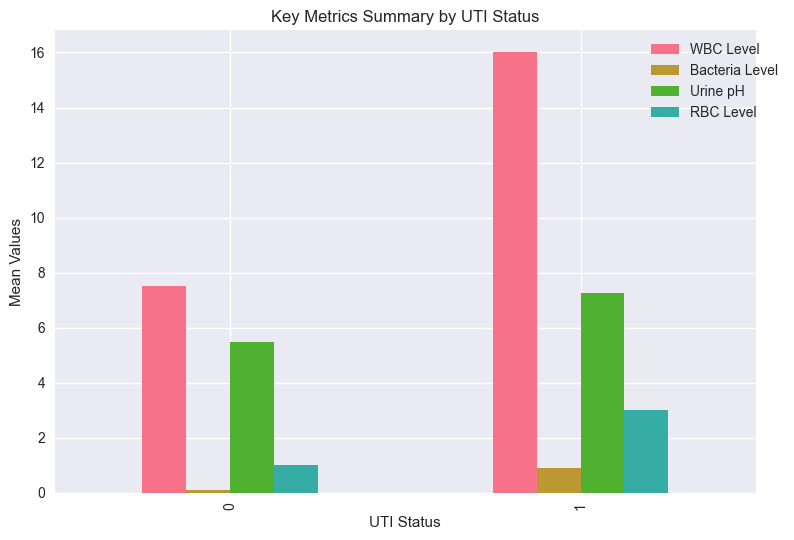

In [13]:
# 5. Create a summary visualization
plt.figure(figsize=(15, 8))

# Prepare data for summary plot
key_metrics = {
    'WBC Level': df.groupby('UTI')['wbc'].mean(),
    'Bacteria Level': df.groupby('UTI')['bacteria'].mean(),
    'Urine pH': df.groupby('UTI')['urine_ph'].mean(),
    'RBC Level': df.groupby('UTI')['rbc'].mean()
}

# Create a grouped bar plot
summary_df = pd.DataFrame(key_metrics)
summary_df.plot(kind='bar')
plt.title('Key Metrics Summary by UTI Status')
plt.xlabel('UTI Status')
plt.ylabel('Mean Values')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Summary of Key Findings

1. Dataset Overview:
   - The dataset contains both clinical symptoms and laboratory results
   - Features include patient demographics, symptoms, and diagnostic indicators
   - Class distribution shows the prevalence of UTI in the population

2. Symptoms Analysis:
   - Most common symptoms identified through frequency analysis
   - Correlation analysis reveals strongest symptom associations with UTI
   - Statistical significance of symptom relationships quantified

3. Lab Results:
   - Significant differences in lab values between UTI and non-UTI cases
   - WBC and bacteria levels show strong diagnostic value
   - Statistical tests confirm the significance of laboratory markers

4. Demographics:
   - Age distribution patterns analyzed between groups
   - Risk factors quantified through odds ratios
   - Gender and comorbidity associations identified

This comprehensive analysis provides a strong foundation for developing predictive models and understanding key UTI indicators.